# Cloud Type Determination by Altitude and Opacity for Climate Studies

Production date: 07-01-2026

Produced by: CNRS


## 🌍 Use case: Monitoring Cloud Amount and Relative Occurrence of Specific Cloud Types

## ❓ Quality assessment question: How did high-level clouds change during the last decades and how did their geographical patterns change with respect to surface temperature anomalies?



Clouds are fundamental regulators of the Earth's climate system, significantly influencing the hydrological cycle, the atmospheric circulation and the Earth's heat balance. These factors, in turn, play a crucial role in shaping ecosystems, agriculture, water resources, and weather patterns. The overall impact of clouds on Earth's climate is determined by their physical properties, including their amount, their height, and their opacity (how much the cloud blocks sunlight and traps heat).
The following notebook essentially focuses on the occurrence of high-level clouds, easiest observed from space, and which have important atmospheric radiative effects : They strongly trap outgoing longwave radiation from the Earth’s surface. While high opaque clouds strongly reflect solar radiation, thin cirrus allow most solar radiation to pass. The net radiative effect of high-level clouds therefore depends on their opacity, given by the optical thickness. Furthermore, a change in the geographical patterns of their relative occurrence leads to changes in the atmospheric circulation and thus in precipitation patterns.
 
This analysis uses cloud observations from the dataset [__Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations__](https://cds.climate.copernicus.eu/datasets/satellite-cloud-properties?tab=overview), available in the Climate Data Store (CDS). Two complementary Thematic Climate Data Records of cloud properties are provided by two product families: CLARA-A3 (CMSAF cLoud, Albedo and surface Radiation) based on measurements by the Advanced Very High Resolution Radiometers (AVHRR), and CCI (Climate Change Initiative), based on measurements by the (Advanced) Along-Track Scanning Radiometers ((A)ATSR). These data differ in temporal sampling, horizontal resolution and use different methods to retrieve cloud properties.

In order to define cloud types according to height and opacity, this notebook uses Joint Cloud Histograms (JCH). These provide monthly cloud occurrence statistics within 13 x 15 two-dimensional intervals in cloud optical thickness (COT) and cloud-top pressure (CTP), averaged over grid cells of 1° latitude x 1° longitude. At present, the CDS only provides the JCHs for CLARA-A3. 

This notebook gives examples how these JCHs can be used to study the occurrence of specific cloud types. We first compare the geographical cloud type distributions of CLARA-A3 with those obtained from other cloud retrievals. Then, the interannual variability of the relative occurrence of three different high-level cloud types (high opaque, cirrus and thin cirrus) is shown in the tropics, and finally we explore their geographical anomaly patterns with respect to global surface temperature changes.

In this notebook, we define high-level clouds as clouds with a cloud-top pressure < 310 hPa. This corresponds to a height of about 10 km in the tropics and 8.5 - 9 km in the midlatitudes. They are then further distinguished as thin cirrus, cirrus and high opaque clouds, using COT thresholds of 1.3 and 9.4, respectively. This cloud type identification corresponds to the one applied in the updated Global Energy and Water Exchanges (GEWEX) cloud assessment [[3]](https://doi.org/10.1007/s10712-024-09824-0), which has recently inter-compared 11 publicly available global cloud data records derived from measurements of multi-spectral imagers, IR sounders, and lidar.

The [__CLARA-A3 cloud detection__](https://www.nwcsaf.org/Downloads/PPS/v2021/Documents/NWC-CDOP3-PPS-SMHI-SCI-ATBD-CloudProbability_v2_0.pdf) relies on a Bayesian approach, by linking measurements from all AVHRR channels to the cloud detection from the Cloud-Aerosol Lidar and Infrared Pathfinder Satellite Observation mission (CALIPSO)[[1]](https://doi.org/10.1175/2010BAMS3009.1) as a reliable reference. 
CTP is retrieved based on a neural network approach, trained on CALIPSO cloud-top height observations. In a second step, it is then transformed to cloud-top height and temperature by applying atmospheric profiles from meteorological reanalyses.
Ice clouds are distinguished from liquid clouds by considering spectral infrared brightness temperature differences. 
COT is only retrieved during daytime, using look-up tables (LUTs) based on visible and near-infrared reflectances and radiative transfer [[2]](https://doi.org/10.5194/essd-9-415-2017).


## 📢 Quality assessment statement

It is important to note that passive remote sensing has limitations: it provides a top-down perspective, which does not account for hidden cloud layers, and classical retrievals, based on radiative transfer, estimate a 'radiative' cloud height. This radiative height can be several kilometers below the actual cloud top, especially in cases where clouds have diffuse tops, with optical depth gradually increasing from the top down over a significant vertical range. This phenomenon is relevant for approximately 70% of high clouds in the tropics and 30-40% of high clouds in the midlatitudes [[4]](https://doi.org/10.1029/94JD02430).

Recent retrievals, such as the one developed for CLARA-A3, obtain the cloud-top height by using neural networks which have been trained on the cloud-top height derived by active lidar (CALIOP).

```{admonition} These are the key outcomes of this assessment
:class: note

- Over the tropics, high-level clouds make up about 55% of all clouds over ocean and 65% over land, in agreement with retrievals by the CALIPSO Science Team. 

- When clouds are classified by opacity, high opaque clouds and cirrus are roughly 10% more frequent over land than over ocean, while thin cirrus is more frequent over ocean. This likely reflects the difficulty of detecting thin cirrus over land. 

- The annual mean time series are stable only for high opaque clouds over tropical ocean. For other high-level cloud types, stable records exist mainly for 2003–2015, when observation times were consistent at around 10 AM and 1:30 PM local time. Outside this period, changes in observation times reduce temporal stability. For monitoring purposes, using a single consistent overpass (e.g., 1:30 PM ±1 h) is recommended.

- Spatial patterns of cloud type changes in response to global surface temperature anomalies show increases near the equator in the tropical Pacific and decreases over Indonesia, consistent with El Niño–Southern Oscillation (ENSO) effects. Thin cirrus amounts also increase near the equator alongside high opaque clouds, reflecting the growth of tropical mesoscale convective systems and their surrounding cirrus.

```

## 📋 Methodology

The analysis comprises the following steps:

**[](section:parameters)**
 * Import the relevant libraries.
 * Define the parameters of the analysis and set the dataset requests.
 * Prepare the datasets for the analysis, first aggregating statistics of liquid and ice clouds, then grouping the initial CTP and COT intervals of the JCHs into three each. This leads to nine cloud types based on the cloud optical thickness (COT) and cloud Top Pressure (CTP).

**[](section:download)**
 * Download the CLARA-A3 monthly mean JCHs and the reanalysis ERA5 land sea mask available on CDS.

**[](section:results)** 
 * Plot geographical maps (60°N-60°S) of the normalized occurrence frequency of these nine cloud types, averaged over the period 2008-2015. 
 * Split sea and ocean data using a land sea mask. 
 * Plot time series of tropical cloud amount, relative proportion of high-level clouds (CTP > 310 hPa) and of thin cirrus, cirrus and high opaque clouds, separately over ocean and land.
 * Compute, per 1° grid cell, linear regression slopes of deseasonalized monthly mean anomalies in relative amount of thin cirrus, cirrus and high opaque clouds with respect to deseasonalized global mean surface temperature anomalies, for the period 2003-2015 over 40°N-40°S. The surface temperature anomalies are given by [__GISTEMP Team 2023__](https://data.giss.nasa.gov/gistemp/) [[5]](https://doi.org/10.1029/2018JD029522).
 * Plot their geographical distributions.


## 📈 Analysis and results

(section:parameters)=
### Choose the parameters to use and setup code

This section includes the library imports and the parameter settings for the analysis.

#### Import libraries

In [1]:
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from cartopy.util import add_cyclic_point
from c3s_eqc_automatic_quality_control import download, plot, utils

plt.style.use("seaborn-v0_8-notebook")

#### Set parameters

In [2]:
# Time
year_start = 1980
year_stop = 2020

# Region
lon_slice = slice(-180, 180)
lat_slice = slice(-60, 60)

# Bins
cot_slices = [slice(None, 1.3), slice(1.3, 9.4), slice(9.4, None)]
ctp_slices = [slice(None, 310), slice(310, 680), slice(680, None)]

# GISS URL
giss_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt"

# Setup figure
key_figure = ['ocean', 'land']
Clouds = ['Thin Ci', 'Ci', 'High opaque']
bound_colorbar = (0.44,0.67,0.48)



#### Define request

two datasets are requested :
- Joint Cloud Histogram (JCH)
- Land Sea Mask (LSM)

In [3]:

requests = {}

requests["satellite-cloud-properties"] = {
    "product_family": "clara_a3",
    "origin": "eumetsat",
    "variable": "joint_cloud_property_histogram",
    "climate_data_record_type": "thematic_climate_data_record",
    "time_aggregation": "monthly_mean",
    "year": [str(year) for year in range(year_start, year_stop + 1)],
    "month": [f"{month:02d}" for month in range(1, 12 + 1)],
}


requests['reanalysis-era5-single-levels'] = {
        'variable': 'land_sea_mask',
        'product_type': 'reanalysis',
        'year': '2020',
        'month': '01',
        'day': '01',
        'time': '00:00',
        'format': "netcdf",
         }

#### Define functions to cache

In [4]:
def infer_label(sel_slice, var_name, units=""):
    if units:
        units = f" {units.strip()}"
    if sel_slice.start is None:
        return f"{var_name} < {sel_slice.stop}{units}"
    if sel_slice.stop is None:
        return f"{var_name} ≥ {sel_slice.start}{units}"
    return f"{sel_slice.start}{units} ≤ {var_name} < {sel_slice.stop}{units}"


def reindex(ds, cot_slices, ctp_slices, lon_slice, lat_slice):
    ds = utils.regionalise(ds, lat_slice=lat_slice, lon_slice=lon_slice)
    datasets = []
    for cot_index, cot_slice in enumerate(cot_slices):
        for ctp_index, ctp_slice in enumerate(ctp_slices):
            ds_limit = ds.sel(
                hist2d_cot_bin_centre=cot_slice,
                hist2d_ctp_bin_centre=ctp_slice,
            )
            ds_limit = ds_limit.sum(
                ["hist_phase", "hist2d_ctp_bin_centre", "hist2d_cot_bin_centre"],
                keep_attrs=True,
            )
            ds_limit = ds_limit.expand_dims(
                COT=[infer_label(cot_slice, "COT")],
                CTP=[infer_label(ctp_slice, "CTP", "hPa")],
            )
            ds_limit = ds_limit.assign_coords(
                cot_index=("COT", [cot_index]), ctp_index=("CTP", [ctp_index])
            )
            datasets.append(ds_limit)
    ds = xr.combine_by_coords(datasets)
    ds = ds.sortby(["cot_index", "ctp_index"]).drop_vars(["cot_index", "ctp_index"])
    ds = ds.drop_dims(["hist2d_cot_bin_border", "hist2d_ctp_bin_border"])

    # Time reindex
    ds = ds.assign_coords(
        year=("time", ds["time"].dt.year.astype(int).values),
        month=("time", ds["time"].dt.month.astype(int).values),
    )
    ds = ds.set_index(time=("year", "month")).unstack("time")
    return ds

(section:download)=
### Download and transform

In [5]:
# Download
datasets = {}
for collection_id, request in requests.items():
    print(f"{collection_id=}")
    if f"{collection_id}" == "satellite-cloud-properties" :
        datasets[collection_id] = download.download_and_transform(
        collection_id,
        request,
        chunks={"year": 1},
        transform_func=reindex,
        transform_func_kwargs={
            "lon_slice": lon_slice,
            "lat_slice": lat_slice,
            "cot_slices": cot_slices,
            "ctp_slices": ctp_slices,
        },
        drop_variables=["lat_bnds", "lon_bnds", "time_bnds"],)
    else :
        datasets[collection_id] = download.download_and_transform(
        collection_id,
        request,)

collection_id='satellite-cloud-properties'


100%|██████████| 41/41 [00:12<00:00,  3.24it/s]


collection_id='reanalysis-era5-single-levels'


100%|██████████| 1/1 [00:00<00:00, 11.43it/s]


(section:results)=
### Results

#### Relative Occurrence of Specific Cloud Types

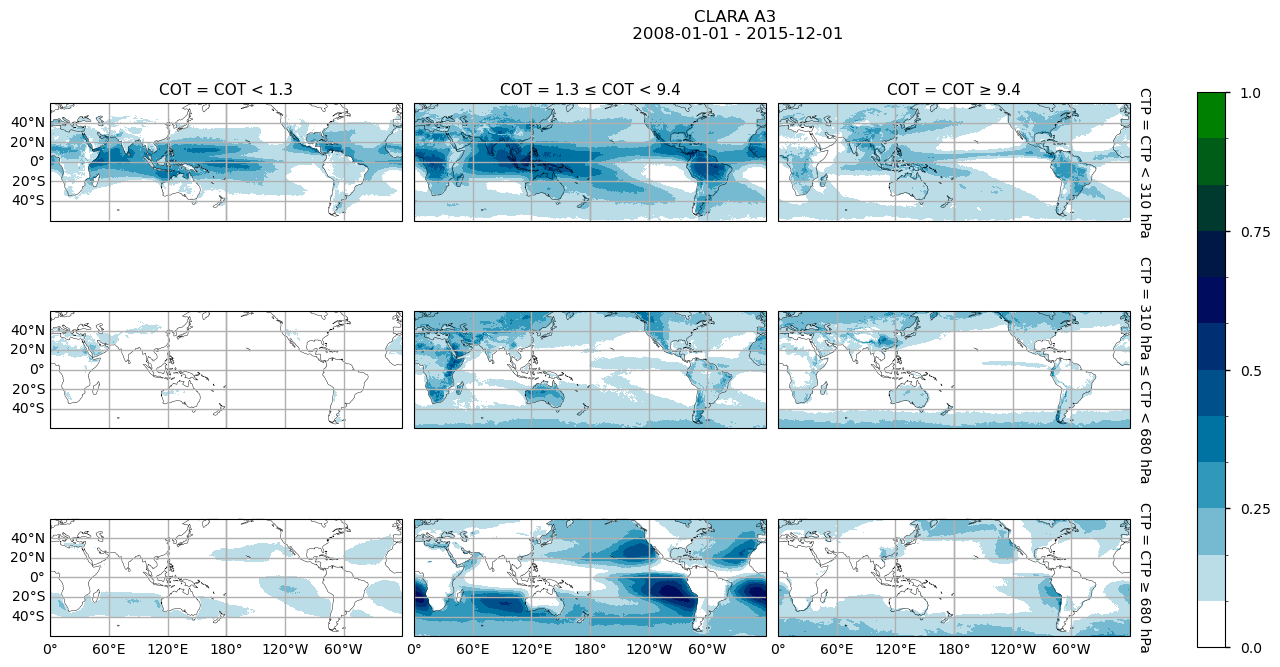

In [6]:
ds = datasets['satellite-cloud-properties']['hist2d_cot_ctp']
da = ds.sel(time = slice ('2008-01-01','2015-12-01')) .sum("time") / ds.sel(time = slice ('2008-01-01','2015-12-01')).sum(["COT", "CTP", "time"])
levels = np.linspace(0, 1, 13)
ticks  = np.array([levels[0], levels[3], levels[6], levels[9], levels[12]])
ticks_round = np.around(ticks, 2)
facet = plot.projected_map(
    da,
    col="COT",
    row="CTP",
    cmap="ocean_r",
    levels=np.linspace(0, 1, 13),
    projection=ccrs.PlateCarree(central_longitude=180),
    figsize=(14, 6),
    cbar_kwargs={"label": "", "ticks": ticks},
)

cbar = facet.cbar
cbar.set_ticks(ticks)
cbar.set_ticklabels(ticks_round)

_ = facet.fig.suptitle(f"CLARA A3\n 2008-01-01 - 2015-12-01", y=1.1)

_Figure 1: Geographical distributions (60°N-60°S) of normalized occurrence frequency of nine cloud types from CLARA-A3, distinguished by Cloud Optical Thickness (COT), with thresholds at 1.3 and 9.4, and Cloud Top Pressure (CTP), with thresholds at 310 and 680 hPa. Statistics averaged over day-time from 2008 to 2015._

The normalized occurrence frequencies of the nine cloud types presented in Figure 1 have been obtained by dividing the statistics of the grouped JCHs by the statistics summed over all JCH intervals, for each 1° grid cell. These maps allow to quickly visualise specific geographical patterns such as tropical thin cirrus, tropical cirrus anvils or Stratocumulus regions off the Western coasts, respectively in the grouped COT-CTP intervals (1,1), (2,1) and (2,3). 
The comparison with the maps of the updated GEWEX cloud assessment, presented in Fig. 10 of [[3]](https://doi.org/10.1007/s10712-024-09824-0) for eight different data sets, leads to the following assessment of CLARA-A3:

Compared to CLARA-A2 (V2.0), CLARA-A3 provides more high-level and less mid-level clouds. This can be easily explained by the fact that the CLARA-A3 neural network retrieval, trained on lidar data, estimates the cloud top, while the classical CLARA-A2 retrieval estimates the lower ‘radiative’ cloud height. 
Another difference can be noticed for the Stratocumulus clouds off the Western coasts, which seem to have a more structured occurrence, again due to the new neural network approach linked to lidar height.

The geographical patterns of the normalized occurrence of tropical thin cirrus given by CLARA-A3 are very similar to the ones given by AIRS-CIRS [[6]](https://acp.copernicus.org/articles/17/13625/2017/acp-17-13625-2017-discussion.html). This indeed shows an improvement compared to CLARA-A2, as IR sounders such as AIRS identify thin cirrus reliably.

The geographical patterns of cirrus are similar to those of PATMOS-x [[7]](https://doi.org/10.1175/JAMC-D-11-02.1), MODIS-CLDPROP [[8]](https://doi.org/10.3390/rs13010002) and AIRS-CIRS[[6]](https://acp.copernicus.org/articles/17/13625/2017/acp-17-13625-2017-discussion.html), with maxima of cirrus anvils above the most convective regions, above Indonesia, South America and Africa. However, CLARA-A3 presents more of these higher thicker clouds in the midlatitudes. This can be explained again by the fact that the neural network retrieval places the high-level clouds close to the tropopause (see also the notebook ‘Intercomparison of cloud-top pressure distributions derived from satellite observations’). 


#### Interannual variability

In [7]:
mask = datasets['reanalysis-era5-single-levels']["lsm"].isel(time=0)
mask= mask.assign_coords(longitude=((mask.longitude + 180)% 360)-180)
mask = mask.sortby("longitude")

ds_cfc = datasets['satellite-cloud-properties']['cfc'].sel(latitude = slice (-25,25)).isel(COT = 1, CTP = 1) 
CA = ds_cfc * 0.01
mask_interp = mask.interp(latitude=CA.latitude, longitude=CA.longitude)
weights_lat = np.abs(np.cos(np.deg2rad(ds_cfc.latitude)))
weights_lat = xr.DataArray(weights_lat, dims=['latitude'], coords={'latitude': ds_cfc.latitude})

CA_land_mean = CA.where(mask_interp >= 0.5).groupby("time.year").mean(skipna = True).weighted(weights_lat).mean(dim = ['longitude', 'latitude'], skipna = True ).compute()
CA_ocean_mean = CA.where(mask_interp <= 0.5).groupby("time.year").mean(skipna = True).weighted(weights_lat).mean(dim = ['longitude', 'latitude'], skipna = True ).compute()

In [8]:
hist = ds.sel(latitude = slice (-25,25))

N_cloud_land = hist.where(mask_interp > 0.5).groupby("time.year").sum(skipna=True).sum(dim=[ "CTP", "COT", "longitude", "latitude"], skipna=True )
N_cloud_ocean = hist.where(mask_interp <= 0.5).groupby("time.year").sum(skipna=True).sum(dim=[ "CTP", "COT","longitude", "latitude"], skipna=True )

N_type_tot_land = hist.isel(CTP = 0).where(mask_interp > 0.5).groupby("time.year").sum(skipna=True).sum(dim=[ "COT", "longitude", "latitude"], skipna=True )
N_type_tot_ocean = hist.isel(CTP = 0).where(mask_interp <= 0.5).groupby("time.year").sum(skipna=True).sum(dim=[ "COT","longitude", "latitude"], skipna=True )


CAR_land = ((N_type_tot_land/ N_cloud_land) *100).compute()
CAR_ocean = ((N_type_tot_ocean / N_cloud_ocean) *100).compute()


In [9]:
figure_CAR = {'land' :{'N_type' : {}},'ocean' :{'N_type' : {} }}
for i in range(len(Clouds)) :
    print(i)
    N_type_land = hist.isel(CTP = 0, COT = i).where(mask_interp > 0.5).groupby("time.year").sum(skipna=True).sum(dim=[ "longitude", "latitude"], skipna=True )
    N_type_ocean = hist.isel(CTP = 0, COT = i).where(mask_interp <= 0.5).groupby("time.year").sum(skipna=True).sum(dim=["longitude", "latitude"], skipna=True )
    
    figure_CAR['land']['N_type'][Clouds[i]] = ((N_type_land/N_cloud_land)*100).compute()
    figure_CAR['ocean']['N_type'][Clouds[i]] = ((N_type_ocean/N_cloud_ocean)*100).compute()

0
1
2


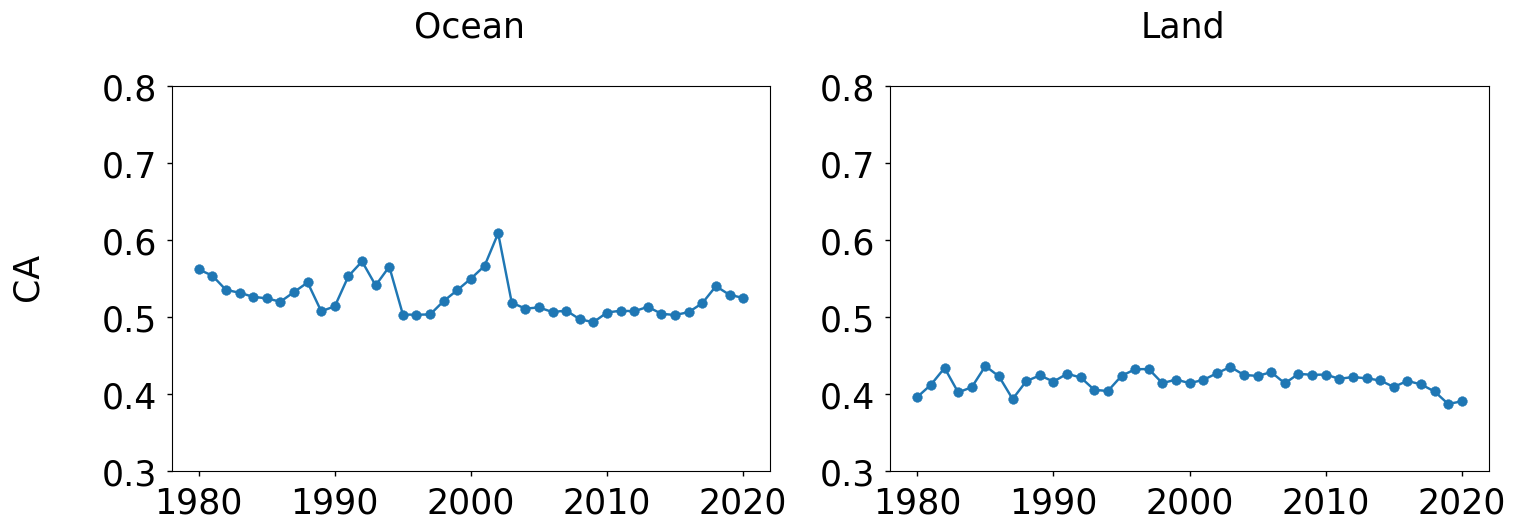

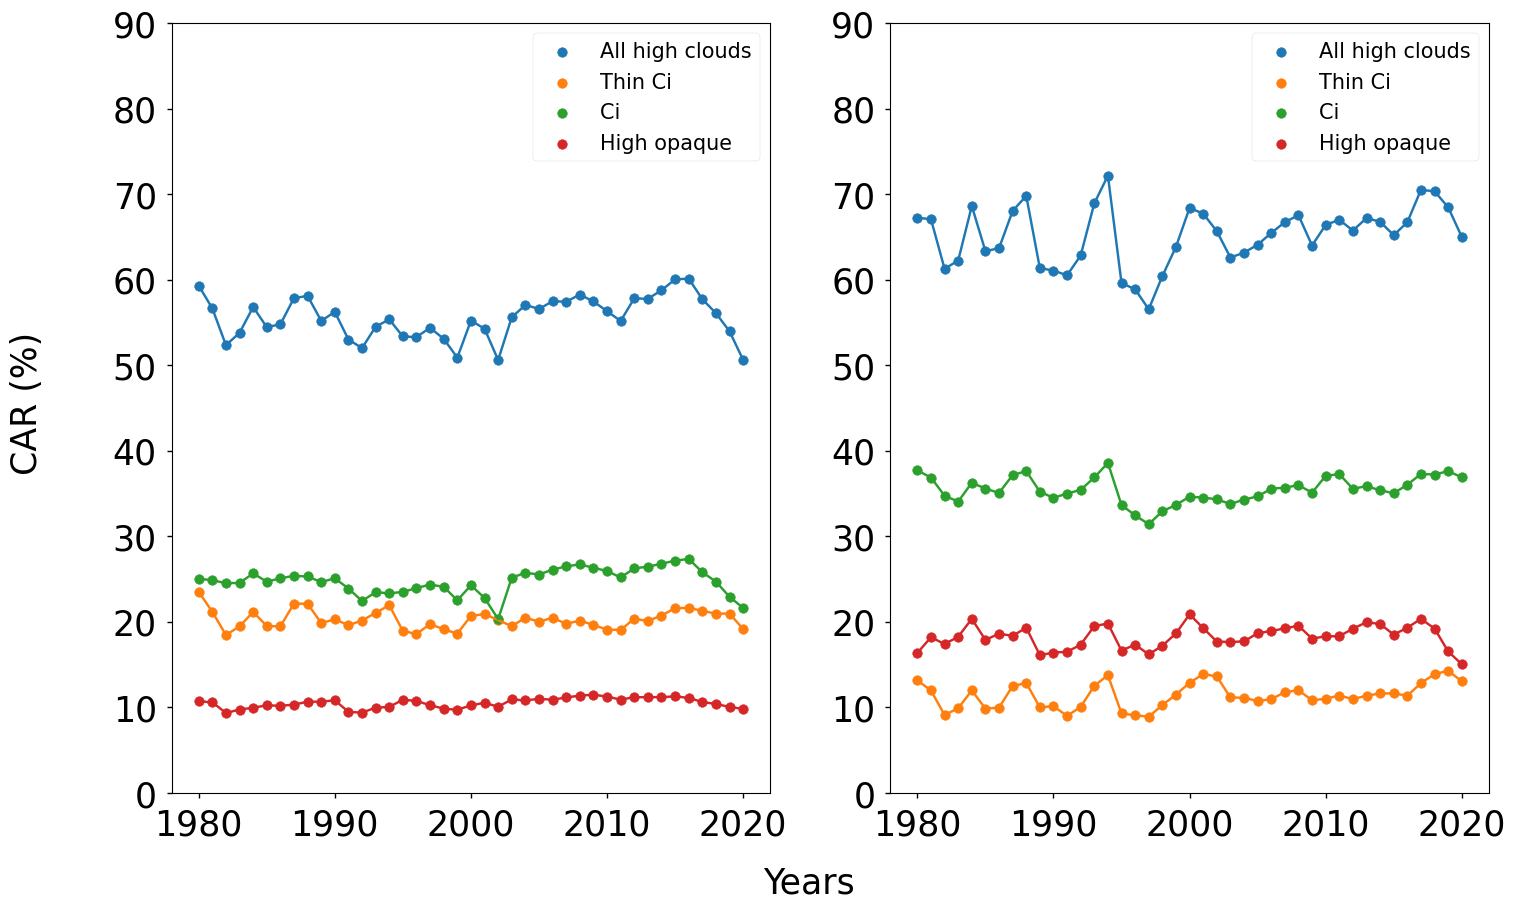

In [19]:
fig , axs = plt.subplots(1, 2, figsize =(17,5))
for k, key in enumerate (key_figure) :
    if k == 1 :
        axs[k].plot(CA_land_mean['year'], CA_land_mean )
        axs[k].scatter(CA_land_mean['year'], CA_land_mean )
    else :
        axs[k].plot(CA_ocean_mean['year'], CA_ocean_mean)
        axs[k].scatter(CA_ocean_mean['year'], CA_ocean_mean)
    axs[k].set_ylim(0.3 , 0.8)
    axs[k].tick_params(axis='both', labelsize=25)


fig.text(0.72, 1, 'Land', ha='center', va='center', rotation='horizontal', fontsize=25)
fig.text(0.30, 1, 'Ocean', ha='center', va='center', rotation='horizontal', fontsize=25)
fig.text(0.04, 0.5, 'CA', ha='center', va='center', rotation='vertical', fontsize=25)
        
plt.show()




fig , axs = plt.subplots(1, 2, figsize =(17,10))
for k, key in enumerate (key_figure) :
    if k == 1 :
        axs[k].plot(CAR_land['year'] , CAR_land )
        axs[k].scatter(CAR_land['year'], CAR_land, label = f'All high clouds' )
    else :
        axs[k].plot(CAR_land['year'], CAR_ocean )
        axs[k].scatter(CAR_land['year'], CAR_ocean, label = f'All high clouds' )
    for i in range(len(Clouds)) : 
        axs[k].plot(CAR_land['year'], figure_CAR[key]['N_type'][Clouds[i]] )
        axs[k].scatter(CAR_land['year'], figure_CAR[key]['N_type'][Clouds[i]], label = f'{Clouds[i]} ' )
    axs[k].set_ylim(0 ,90)
    axs[k].tick_params(axis='both', labelsize=25)
    axs[k].legend(fontsize=15)


fig.text(0.5, 0.02, 'Years', ha='center', va='center', fontsize=25)
fig.text(0.04, 0.5, 'CAR (%)', ha='center', va='center', rotation='vertical', fontsize=25)
        
plt.show()

_Figure 2: Time series of annual means of (top) tropical cloud amount (blue) and (bottom) relative proportion of all high-level clouds (CTP > 310 hPa, blue), thin cirrus (Thin Ci, orange), cirrus (Ci, green) and high opaque clouds (red), separately over ocean (left) and over land (right). Statistics averaged over 25N – 25S, for 1980 - 2020, during daytime. Only during the period 2003-2015, two observation times are used homogeneously at around 10AM and 1:30PM local time. Before that period, only afternoon observations are used, which have been less stable in time, and afterwards only morning observations, as the afternoon observations strongly drifted in time._ 

The JCHs also include the cloud area fraction for each 1° grid cell. Since the JCHs include only cloudy statistics, this variable can be used as a weight in order to transform relative occurrences into absolute occurrences. 

The upper panels of Figure 2 present time series of the annual mean cloud amount (CA). It is calculated as the latitudinal average of the annual mean fractional cloud cover. The blue curves can be compared to the results presented in Fig. 12 of the updated GEWEX cloud assessment [[3]](https://doi.org/10.1007/s10712-024-09824-0). The time series of CA is relatively more stable over tropical land than over tropical ocean, the latter showing two significant increases in the early 1990’s and in 2002. These increases over ocean also appear in the CA of PATMOS-x, while other data records, including CLARA-A2, do not show this behaviour. This can be explained by the fact that PATMOS-x uses a similar cloud detection method. 
The CA of CLARA-A3 over tropical ocean is about 0.1 higher than over tropical land, in agreement with AIRS-CIRS, CALIPSO-ST and MODIS-CE. However, while the fractional cloud cover of CLARA-A3 and CLARA-A2 (V2.1) are similar in the tropical latitude bands in the notebook ‘Satellite cloud cover validation for Climate modelling, ’the CA of CLARA-A3 over tropical land only lies by about 0.4, compared to about 0.5 of CLARA-A2 (V2.0) and of the other retrievals using AVHRR measurements. The CA of CLARA-A3 over tropical land is close to the one of CALIPSO-ST_passive, which simulates the one retrieved by passive imagers by limiting the detection of clouds to those with COT > 0.3, but which is lower than what provide most of the other cloud data records.

The lower panels of Figure 2 present time series of the annual mean relative amount of all high-level clouds (blue), as well as of thin cirrus (orange), cirrus (green) and high opaque clouds (red), separately over tropical ocean and over tropical land. The threshold of 310 hPa corresponds in the tropics to a height of about 10 km. The relative amount of high-level clouds from CLARA-A3 is relatively large and compares well with the one obtained by CALIOP by the CALIPSO Science Team (CALIPSO-ST), with about 60% and 70% respectively. However, the interannual variability has not the same behaviour. 
It was already pointed out in [[3]](https://doi.org/10.1007/s10712-024-09824-0) that it is very difficult to observe latitudinal trends with the cloud data records currently available, and the AVHRR cloud products, which exist over a 40-year period, are more stable after 2003. However, global warming increased during the last 20 years. The CLARA-A3 cloud data records also show differences in behaviour between the periods before and after 2003. This can be explained by the observation times which have been used to create the CLARA-A3 JCHs: Only during the period 2003-2015, two observation times are used homogeneously at around 10AM and 1:30PM local time. Before that period, only afternoon observations are used, which have been less stable in time, and afterwards only morning observations, as the afternoon observations strongly drifted in time.

For a comparison of the time series of the three high-level cloud type occurrences, we have analysed the JCHs of the [__updated GEWEX cloud assessment database__](https://gewexca.aeris-data.fr/), by applying the same CTP and COT thresholds. 

The most stable CLARA-A3 relative amount is the one of high opaque clouds over tropical ocean, of about 11%. This amount is nearly twice as large (about 18%) and less stable over tropical land. The largest amount is the one of cirrus, with 25% over tropical ocean and 35% over tropical land. The relative amount of thin cirrus shows an opposite behaviour, with 20% over tropical ocean and 10% over tropical land. These results are similar to the ones of MODIS-CLDPROP, though with larger absolute values, as the high-level cloud amount is about 15% larger for CLARA-A3. However, PATMOS-x, also based on AVHRR measurements, does not show any difference between tropical ocean and land for thin cirrus and high opaque clouds.  
According to CLARA-A3, the relative amount of all three high-level cloud types seems to slightly increase since the 2000’s. However, this behaviour is not observed in the other datasets (PATMOS-x, MODIS-CLDPROP and AIRS-CIRS).

#### Anomaly Patterns link to the Global Surface Temperature

In [11]:
df = pd.read_csv(
    giss_url,
    sep=r"\s+",
    skiprows=7,
    skipfooter=7,
    na_values=["***", "****"],
    index_col="Year",
    usecols=range(13),
    engine="python",
)
df = 0.01 * df[df.index != "Year"].astype(float)
da_temp = xr.DataArray(
    [
        df.loc[date.dt.strftime("%Y").values, date.dt.strftime("%b").values]
        for date in ds["time"].sel(time = slice ('2003-01-01','2015-12-01') )
    ],
    dims="time",
    coords={"time": ds["time"].sel(time = slice ('2003-01-01','2015-12-01')) },
)
da_temp_anomaly = da_temp.groupby("time.month") - da_temp.groupby("time.month").mean()

In [ ]:
da = ds.sel(latitude = slice(-40,40), time = slice ('2003-01-01','2015-12-01'))
dn = da.sum(["COT", "CTP"]).mean(dim= ['time'])
da = (da.groupby("time.month") - da.groupby("time.month").mean())/dn
da = da.assign_coords(temperature=da_temp_anomaly)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    da = (
        da.polyfit("temperature", deg=1)["polyfit_coefficients"].sel(degree=1).compute()
    )

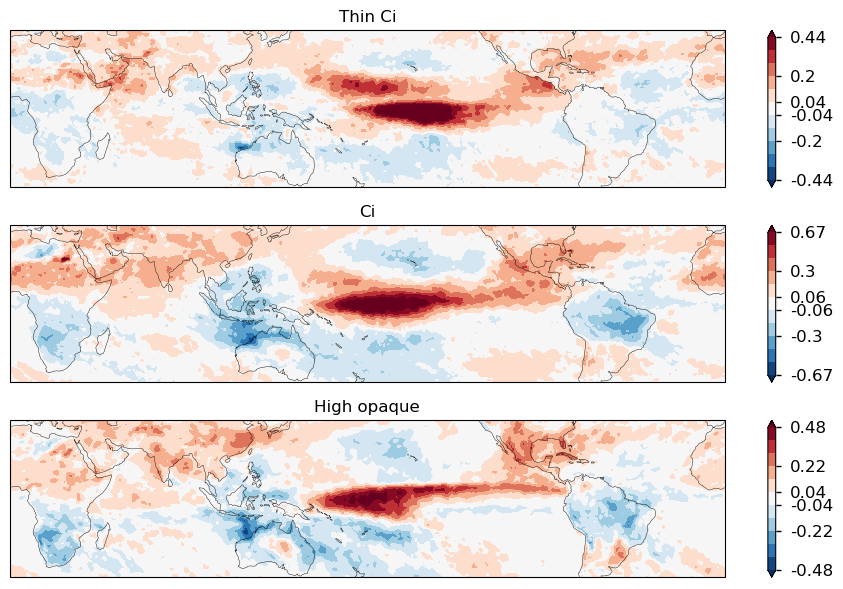

In [18]:
da = da.assign_coords(longitude=(da.longitude + 180) % 360)

fig, axs = plt.subplots(3, 1, figsize=(22, 6),
                        subplot_kw={"projection": ccrs.PlateCarree(central_longitude=180)})

for i in range(3):
    
    lmax = bound_colorbar[i]
    lmin = -lmax

    levels = np.linspace(lmin,lmax,12)
    ticks  = np.array([levels[0], levels[3], levels[5], levels[6], levels[8], levels[11]])

    
    da_sel = da.isel(CTP=0, COT=i)

    data_cyclic, lon_cyclic = add_cyclic_point(da_sel, da_sel["longitude"])

    im = axs[i].contourf(lon_cyclic,da_sel['latitude'],data_cyclic,transform=ccrs.PlateCarree(central_longitude=180),cmap='RdBu_r',levels=levels, extend = 'both')
    axs[i].coastlines()
    axs[i].set_title(f"{Clouds[i]}")
    
    cbar = fig.colorbar(
        im,
        ax=axs[i],
        orientation='vertical',
        fraction=0.03,
        pad=0.02,
        ticks=ticks,
    ) 

    cbar.ax.tick_params(labelsize='large')
    ticks_round = np.around(ticks, 2)
    cbar.set_ticklabels(ticks_round)

plt.tight_layout()

_Figure 3: Geographical maps of linear regression slopes between monthly mean anomalies in amount of thin cirrus (left), cirrus (middle) and high opaque clouds (right), relative to all clouds, and global mean surface temperature anomalies, during the period 2003-2015, over 40°N-40°S. Units are in fractional change per °C warming. The global mean surface temperatures are given by the [__GISS Surface Temperature Analysis__](https://data.giss.nasa.gov/gistemp/) [[9]](https://doi.org/10.1029/2023JD040179)._

Since it is difficult to observe latitudinal trends, an alternative approach is to analyse regional cloud type variability with respect to inter-annual global mean surface temperature anomalies.

The monthly deseasonalized 1° x 1° relative cloud type amount anomalies and global surface temperature anomalies are obtained by subtracting the monthly mean (at 1° resolution and global, respectively) over the whole period, 2003 – 2015. Then, we determine geographical change patterns in amount of these cloud types, relative to all clouds, with respect to global surface temperature change by calculating the linear regression slopes of the ratio between relative cloud type amount anomaly and global surface temperature anomaly, per grid cell. 
CLARA-A3 shows a relative increase per °C of warming of all these three cloud types near the equator in the tropical Pacific and a decrease over Indonesia, similar to the cloud datasets in the updated GEWEX cloud assessment and similar the pattern caused by the El Niño–Southern Oscillation (ENSO [10] (https://doi.org/full/10.1029/2018GL077598)).

We also observe an increase in cirrus and thin cirrus in the subtropics. This may be in relation to a hypothesized widening of the Hadley cell with global warming [[11]](https://doi.org/10.1038/s41558-018-0246-2). 

The relative amount of thin cirrus also increases around the equator, close to the increase of high opaque clouds. This can be reconciled with the findings that tropical mesoscale convective systems get higher [[12]](https://doi.org/10.5194/acp-21-1015-2021) and the area of surrounding thin cirrus gets larger with their height [[13]](https://doi.org/10.5194/acp-17-3845-2017). 

The different geographical change patterns of high opaque clouds and thin cirrus lead to variations in atmospheric heating and cooling gradients which then influence the large scale circulation, as has already been investigated [[14]](https://doi.org/abs/10.1002/qj.49711749805).


## ℹ️ If you want to know more
### Key resources
Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entry for the data used is:
- [__Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations__](https://cds.climate.copernicus.eu/datasets/satellite-cloud-properties?tab=overview)

Code libraries used:
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`, prepared by [B-Open](https://www.bopen.eu/)


### Reference/Useful material

[[1]](https://doi.org/10.1175/2010BAMS3009.1) Winker DM, Pelon J, Coakley JA Jr et al (2010) The CALIPSO mission: a global 3D view of aerosols and clouds. Bull Am Meteorol Soc 91:1211–1229. https://doi.org/10.1175/2010BAMS3009.1

[[2]](https://doi.org/10.5194/essd-9-415-2017) Benas, N., Finkensieper, S., Stengel, M., van Zadelhoff, G.-J., Hanschmann, T., Hollmann, R., and Meirink, J. F., 2017: The MSG-SEVIRI-based cloud property data record CLAAS-2, Earth System Science Data, 9, 415–434, doi:10.5194/essd-9-415-2017

[[3]](https://doi.org/10.1007/s10712-024-09824-0) Stubenrauch, C.J., Kinne, S., Mandorli, G. et al. Lessons Learned from the Updated GEWEX Cloud Assessment Database. Surv Geophys 45, 1999–2048 (2024). https://doi.org/10.1007/s10712-024-09824-0

[[4]](https://doi.org/10.1029/94JD02430) Liao, X., W. B. Rossow, and D. Rind (1995), Comparison between SAGE II and ISCCP high-level clouds: 2. Locating cloud tops, J. Geophys. Res., 100(D1), 1137–1147, doi:10.1029/94JD02430

[[5]](https://doi.org/10.1029/2018JD029522) Lenssen, N., G. Schmidt, J. Hansen, M. Menne, A. Persin, R. Ruedy, and D. Zyss, 2019: Improvements in the GISTEMP uncertainty model. J. Geophys. Res. Atmos., 124, no. 12, 6307-6326, doi:10.1029/2018JD029522.

[[6]](https://acp.copernicus.org/articles/17/13625/2017/acp-17-13625-2017-discussion.html) Stubenrauch CJ, Feofilov AG, Protopapadaki SE, Armante R (2017) Cloud climatologies from the infrared sounders AIRS and IASI: strengths and applications. Atmos Chem Phys 17:13625–13644. https://doi.org/10.5194/acp-17-13625-2017

[[7]](https://doi.org/10.1175/JAMC-D-11-02.1) Heidinger AK, Evan AT, Foster MJ, Walther A (2012) A naive Bayesian cloud detection scheme derived from CALIPSO and applied within PATMOS-x. J Appl Meteorol Climatol 51:1129–1144. https://doi.org/10.1175/JAMC-D-11-02.1

[[8]](https://doi.org/10.3390/rs13010002) Platnick S, Meyer K, Wind G, Holz RE, Amarasinghe N, Hubanks PA, Marchant B, Dutcher S, Veglio P (2021) The NASA MODIS-VIIRS continuity cloud optical properties products. Remote Sens 13:2. https://doi.org/10.3390/rs13010002

[[9]](https://doi.org/10.1029/2023JD040179) Lenssen, N., G.A. Schmidt, M. Hendrickson, P. Jacobs, M. Menne, and R. Ruedy, 2024: A GISTEMPv4 observational uncertainty ensemble. J. Geophys. Res. Atmos., 129, no. 17, e2023JD040179, doi:10.1029/2023JD040179.

[[10]](https://doi.org/full/10.1029/2018GL077598) Stephens, G. L., Hakuba, M. Z., Webb, M. J., Lebsock, M., Yue, Q., Kahn, B. H., et al. (2018). Regional intensification of the tropical hydrological cycle during ENSO. Geophysical Research Letters, 45, 4361–4370. https://doi.org/10.1029/2018GL077598

[[11]](https://doi.org/10.1038/s41558-018-0246-2) Staten, P.W., Lu, J., Grise, K.M. et al. Re-examining tropical expansion. Nature Clim Change 8, 768–775 (2018). https://doi.org/10.1038/s41558-018-0246-2

[[12]](https://doi.org/10.5194/acp-21-1015-2021) Stubenrauch, C. J., Caria, G., Protopapadaki, S. E., and Hemmer, F.: 3D radiative heating of tropical upper tropospheric cloud systems derived from synergistic A-Train observations and machine learning, Atmos. Chem. Phys., 21, 1015–1034, https://doi.org/10.5194/acp-21-1015-2021, 2021.

[[13]](https://doi.org/10.5194/acp-17-3845-2017) Protopapadaki, S. E., Stubenrauch, C. J., and Feofilov, A. G.: Upper tropospheric cloud systems derived from IR sounders: properties of cirrus anvils in the tropics, Atmos. Chem. Phys., 17, 3845–3859, https://doi.org/10.5194/acp-17-3845-2017, 2017.

[[14]](https://doi.org/abs/10.1002/qj.49711749805) Slingo, J.M. and Slingo, A. (1991), The response of a general circulation model to cloud longwave radiative forcing. II: Further studies. Q.J.R. Meteorol. Soc., 117: 333-364. https://doi.org/10.1002/qj.49711749805